# Where do new traits come from?

This notebook will explore a simple example of the evolution of new traits

Let's start with a simple simulation of a basic blob population living in a basic environment. These blobs will be okay at surviving and okay at reproducing, but will do nothing much else

In [1]:
import sys
sys.path.append('..')
from environment import *
from blobs import *

%load_ext autoreload
%autoreload 2

## Origin of new traits

Now that we have a handle on how populations shrink or grow from Lesson 3, let's try simulating where new traits come into play

Let's make two new blob types that vary solely based off their survival rates

In [2]:
class Dier(BaseBlob):
    """I mostly die"""
    def __init__(self):
        super().__init__()
        self.name = 'Diers'
        self.color = 'pink'
        self.repr_class = Dier
        
        self.survival_prob = 0.4
        self.reproduction_prob = 0.5
        self.mutation_prob = 0.0
        
class Survivor(BaseBlob):
    """I mostly survive"""
    def __init__(self):
        super().__init__()
        self.name = 'Survivor'
        self.color = 'purple'
        self.repr_class = Survivor
        
        self.survival_prob = 0.8
        self.reproduction_prob = 0.5
        self.mutation_prob = 0.0

In [3]:
diers = [Dier() for x in range(20)]
survivors = [Survivor() for y in range(20)]

Based off these relative values, one would expect the `Survivor`s to prosper and the `Dier`s to die off early

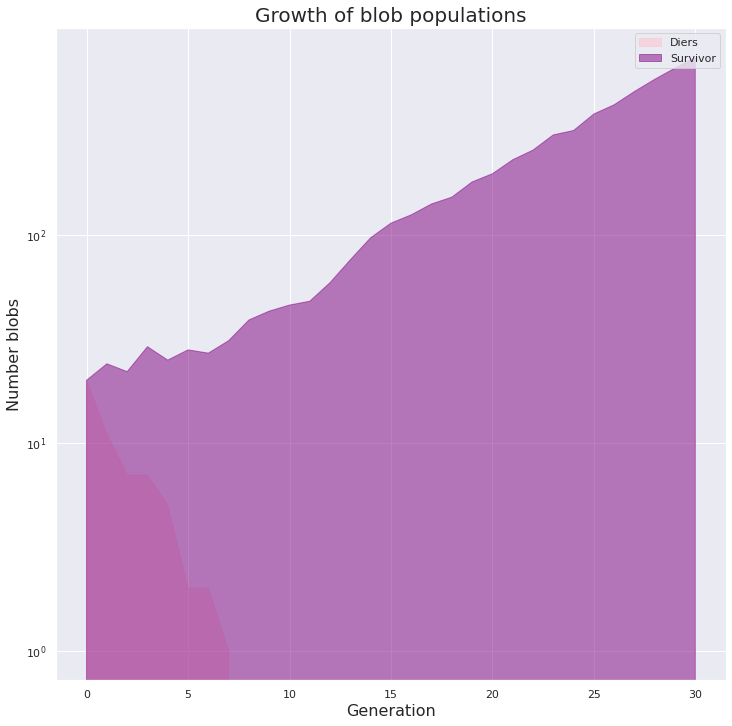

In [4]:
e = BaseEnvironment()
e.spawn_population(diers + survivors)

for i in range(30):
    e.interact()
    
e.plot_growth(log=True)

That checks out. Now that we've established that having a survival rate considerably lower than a reproductive rate is a disadvantage for long-term survival, let's introduce a mutation to the `Dier`s that produces sturdier offspring

In [5]:
class Dier(BaseBlob):
    """I mostly die"""
    def __init__(self):
        super().__init__()
        self.name = 'Diers'
        self.color = 'pink'
        self.repr_class = Dier
        
        self.survival_prob = 0.4
        self.reproduction_prob = 0.5
        self.mutation_prob = 0.2 #Now I have a very small chance of mutating into a SturdyDier
        self.mutation_class = SturdyDier
        
class SturdyDier(BaseBlob):
    """My parents died a lot, but I am pretty sturdy"""
    def __init__(self):
        super().__init__()
        self.name = 'SturdyDier'
        self.color = 'yellow'
        self.repr_class = SturdyDier
        
        self.survival_prob = 0.9
        self.reproduction_prob = 0.5
        self.mutation_prob = 0.0

In [6]:
diers = [Dier() for x in range(20)]

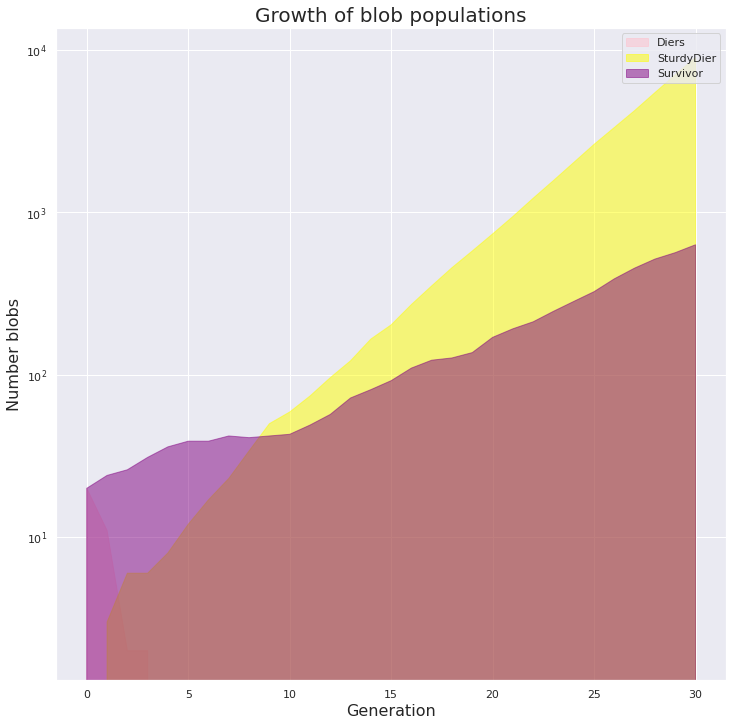

In [7]:
e = BaseEnvironment()
e.spawn_population(diers + survivors)

for i in range(30):
    e.interact()
    
e.plot_growth(log=True)

Wow! Even though the `SturdyDiers` didn't exist from the start, once the mutations began, they quickly took over. In fact, the original population of `Dier`s died off really quickly but the population of `SturdyDiers` quickly took off and surpassed that of the `Survivor`s despite only a small advantage in survival

While this seems simple, consider that:
1. We have produced a simple model of natural selection just by altering the value of a single trait
2. The graph above is a log scale, which means that very quickly after just this small increase in survival advantages appeared, it took over. This goes to show how even small advantages in nature can manifest in large, species-wide effects